In [2]:
%pip install openpyxl appscript psutil xlwings -q

Note: you may need to restart the kernel to use updated packages.


### [Syntax Overview](https://docs.xlwings.org/en/latest/syntax_overview.html)

In [3]:
import xlwings as xw
# Active app (i.e. Excel instance)
app = xw.apps.active
app


<App [excel] 1456>

In [4]:
#!TODO The object you are trying to access does not exist
# Active book
wb = xw.books.active  # in active app
#wb

In [5]:
#TODO The object you are trying to access does not exist
#wb = app.books.active  # in specific app
#wb

In [6]:
#TODO The object you are trying to access does not exist
# Active sheet
#sheet = xw.sheets.active  # in active book
#sheet

In [7]:
# import necessary packages
import numpy as np
import pandas as pd
import xlwings as xw

# path to data we just downloaded
# if you are interested in how modelpoints were created,
# check out the `generating_modelpoints.ipynb` file in the repo
DATA_XLS = "./dstoolkit/model_point.xlsx"

# ingesting our data into a dataframe (df)


# Open workbook in < Interactve Mode >
#new = xw.Book()
wb = xw.Book(DATA_XLS) # connect to a file that is open or in the current working directory

In [8]:
wb

<Book [model_point.xlsx]>

In [9]:
wb.sheets


Sheets([<Sheet [model_point.xlsx]Sheet1>])

### Selecting a named range `model_point` in `wb.sheets[0]`

In [10]:
pd.DataFrame(wb.sheets[0].range('model_point').value)

,0,1,2,3,4,5,6,7,8,9,10
0,policy_id,UUid,Age At Entry,Sex,Policy Term,Policy Count,Sum Assured,Issue date,Payment freq,Payment_term,Premium
1,1.0,ee7602f8-c0ef-11ed-9035-0242ac1c000c,47.0,M,10.0,86.0,622000.0,2021-12-15 00:00:00,1.0,5.0,None
2,2.0,ee7604c4-c0ef-11ed-9035-0242ac1c000c,29.0,M,20.0,56.0,752000.0,2004-07-02 00:00:00,2.0,None,61.139589
3,3.0,ee76055a-c0ef-11ed-9035-0242ac1c000c,51.0,F,None,83.0,799000.0,2020-10-02 00:00:00,12.0,10.0,158.651775
4,4.0,ee7605d2-c0ef-11ed-9035-0242ac1c000c,32.0,F,20.0,72.0,422000.0,2011-08-05 00:00:00,1.0,10.0,39.517808
...,...,...,...,...,...,...,...,...,...,...,...
9996,9996.0,ee887c26-c0ef-11ed-9035-0242ac1c000c,47.0,None,20.0,25.0,827000.0,2008-12-01 00:00:00,1.0,10.0,191.420371
9997,9997.0,ee887ca8-c0ef-11ed-9035-0242ac1c000c,30.0,M,15.0,81.0,826000.0,2008-01-13 00:00:00,1.0,15.0,None
9998,9998.0,ee887d34-c0ef-11ed-9035-0242ac1c000c,45.0,F,20.0,10.0,None,2009-11-07 00:00:00,2.0,10.0,None
9999,9999.0,ee887dca-c0ef-11ed-9035-0242ac1c000c,39.0,M,20.0,9.0,302000.0,2021-01-22 00:00:00,12.0,10.0,41.381991


Get the process id `pid` of the Excel instances open 


In [53]:
xw.apps.keys()

[1456]

In [56]:
wb.sheets

Sheets([<Sheet [model_point.xlsx]Sheet1>])

In [58]:
wb.sheets['Sheet1']

<Sheet [model_point.xlsx]Sheet1>

# `xwings` : `Interactive Mode`

In [41]:
# to list the sheets in the workbook in xlwings
wb.sheets

Sheets([<Sheet [model_point.xlsx]Sheet1>])

In [45]:
# Looking at the values in our newly created workbook
print(wb.sheets[0]["A1"].value)

policy_id


## Modifying Excel Workbook from `python`

In [34]:
# Assigning values to a cell
# Notice the mismatched dimensionality
# Impact is similar to pasting table into a cell in Excel
wb.sheets[0]["A1"].value = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

We obsere, not only does our `pd.DataFrame` expands beyond `"A1"`,`"A1"` is not filled with the `pd.DataFrame` 

However if we assign a  single value to `"A1"` the value of `"A1"` itself is set. Seems to be related to the dimensionality mismatch. Is almost like pasting a table to a cell in Excel.

# `xwings` : `Reader Mode`

In [2]:
# Reader mode: read
import os
os.listdir("cluster")

['cashflows_seriatim_10K.xlsx',
 'generate_model_points_for_cluster.ipynb',
 'PV_shocks.xlsx',
 'BasicTerm_ME_for_Cluster',
 'pv_seriatim_10K_lapse50.xlsx',
 'pv_seriatim_10K.xlsx',
 'cashflows_seriatim_10K_lapse50.xlsx',
 'pv_seriatim_10K_mort15.xlsx',
 'cluster_model_points.ipynb',
 'cashflows_seriatim_10K_mort15.xlsx']

### Loading our data into `xw.sheet` objects?

In [11]:
base = xw.Book('cluster/cashflows_seriatim_10K.xlsx')
base.sheets

Sheets([<Sheet [cashflows_seriatim_10K.xlsx]Sheet1>])

In [12]:
lapse50 = xw.Book('cluster/cashflows_seriatim_10K_lapse50.xlsx')
lapse50.sheets

Sheets([<Sheet [cashflows_seriatim_10K_lapse50.xlsx]Sheet1>])

In [13]:
mort15 = xw.Book('cluster/cashflows_seriatim_10K_mort15.xlsx')
mort15.sheets

Sheets([<Sheet [cashflows_seriatim_10K_mort15.xlsx]Sheet1>])

In [18]:
base.sheets[0].range('A1').expand().value

[['policy_id',
  0.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0],
 [1.0,
  454.9299378113864,
  310.3003919376886,
  190.4024364211062,
  103.6608518840843,
  60.24235775781676,
  21.08804089177246,
  -16.54439565289846,
  -27.75106898414493,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [2.0,
  -113.4789338521518,
  -155.8602215755959,
  -41.34161711470104,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [3.0,
  676.8129498402138,
  428.8044524678375,
  239.0650370398154,
  144.6283787932124,
  59.78654303234372,
  -21.43150531025817,
  -61.84904422083824,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [4.0,
  38.41953178821721,
  17.67018372375606,
  -3.802256044561283,
  -26.06732098178666,
  -49.20060519694849,
  -73.2843425115

/Users/neelanpather/dev/dstoolkit/.conda/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: x and y can be no greater than 2D, but have shapes (1,) and (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)

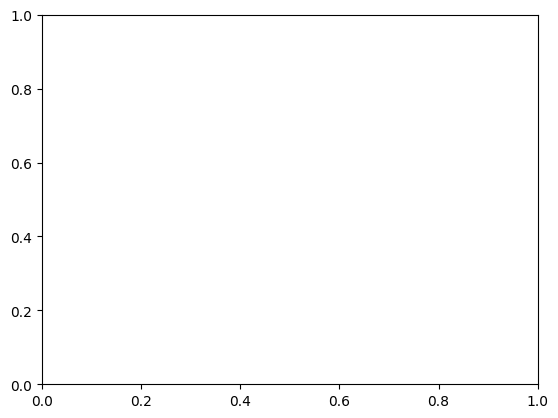

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot()

### What can one do with a sheet object?

```
for func in list(dir(base)):
    if not func.startswith("_"):
        print("\n" + str(func) + "\n")
        print(getattr(base,func))
```

In [43]:
# How .selection works
for i in [0, 1, -1]:
    print(str(base.selection(i)) + "\n")


<Range [cashflows_seriatim_10K_mort15.xlsx]Sheet1!$A$1>

<Range [cashflows_seriatim_10K_mort15.xlsx]Sheet1!$A$1>

<Range [cashflows_seriatim_10K_mort15.xlsx]Sheet1!$A$1048576>



In [62]:
len(base.selection(0).expand().value)

10001

In [ ]:
len(base.selection(0).expand().value)

### [`TOP-LEVEL FUNCTIONS: view()`](https://docs.xlwings.org/en/stable/api/top_level_functions.html#xlwings.view)

`view()` takes any object and writes it to an Excel table as a new object


> *ℹ️ Only use this in an interactive context like e.g. a Jupyter notebook! Don’t use this in a script as it depends on the active book.*


In [69]:
from xlwings import view
# using `view` we can see how .selection.expand() works
# notice how .expand() selects all adjacent cells
df = pd.DataFrame(data = base.selection(0).expand().value)
view(df)

In [84]:
#If you wanted to reuse the same workbook,
# provide a sheet object
#TODO! This is not working 
#specific_sheet = xw.Book()
#view(df, sheet=specific_sheet)

### [`TOP-LEVEL FUNCTIONS: load()`](https://docs.xlwings.org/en/stable/api/top_level_functions.html#xlwings.load)

Loads the selected cell(s) of the active workbook into a `pd.DataFrame`.

If you select a single cell that has adjacent cells, the range is auto-expanded (via current region) and turned into a `pd.DataFrame`

> *ℹ️ Only use this in an interactive context like e.g. a Jupyter notebook! Don’t use this in a script as it depends on the active book.*

In [99]:
base = xw.Book('cluster/cashflows_seriatim_10K.xlsx')
base_df = xw.load()

In [92]:
lapse50 = xw.Book('cluster/cashflows_seriatim_10K_lapse50.xlsx')
lapse50_df = xw.load()

In [91]:
mort15 = xw.Book('cluster/cashflows_seriatim_10K_mort15.xlsx')
mort15_df = xw.load()

### [`UDF decorators`](https://docs.xlwings.org/en/stable/api/udf_decorators.html)
